In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import numpy as np
import re
import glob
import os

## Data Scrapping and Transform

In [ ]:
class InterconnectionScraper:
    def __init__(self):
        self.years = list(range(2015,2024))
    def check_parameter(self,year):
        assert year in self.years, "the year passed was not one of ', '.join(self.years))"
    def make_request(self, year):
        self.check_parameter(year)
        url = f"https://www.energy-charts.info/charts/import_export/chart.htm?l=en&c=DE&year={year}"

        chrome_driver_path = "/opt/homebrew/bin/chromedriver"
        driver = webdriver.Chrome(executable_path=chrome_driver_path)

        driver.get(url)
        soup = BeautifulSoup(driver.page_source,"html5lib")
        
        return soup
    def retrieve_interconnector_flows(self,year):
        soup = self.make_request(year)
        df_country_flows = pd.DataFrame(columns=["From_1","To_1","Value_1","From_2","To_2","Value_2","Year"])

        for row in soup.find_all("path", class_="chord"):
            text = row.text
            text_list = text.split("→")
            from_1 = text_list[0]
            to_1 = text_list[1].split(":")[0]
            value_1 = text_list[1].split(":")[1].split("\n")[0]
            from_2 = text_list[1].split(":")[1].split("\n")[1]
            to_2 = text_list[2].split(":")[0]
            value_2 = text_list[2].split(":")[1]
            year = year

            df_country_flows = df_country_flows.append({"From_1":from_1,"To_1":to_1,"Value_1":value_1,"From_2":from_2,"To_2":to_2,"Value_2":value_2,"Year":year},ignore_index=True)

        return df_country_flows
            

            
        

In [ ]:
scraper = InterconnectionScraper()

start_year = 2015
end_year = 2024

years = list(range(start_year,end_year)) 

df_all = pd.DataFrame(columns=["From_1","To_1","Value_1","From_2","To_2","Value_2","Year"])

for i in years:
    df = scraper.retrieve_interconnector_flows(i)
    df_all = df_all.append(df)


In [ ]:
df_all.head(10)

In [ ]:
to_move = df_all.loc[:,["From_2","To_2","Value_2","Year"]]

df_origin = df_all.loc[:,["From_1","To_1","Value_1","Year"]]

to_move.rename(columns={"From_2":"From_1","To_2":"To_1","Value_2":"Value_1"},inplace=True)

df = pd.concat([df_origin,to_move])

In [ ]:
value_list = []

for i in df["Value_1"]:
    results = re.search("TWh",i)

    if results:
        value = i.replace("TWh","")
        value = float(value)*1000
        value_list.append(value)
    else:
        value = i.replace("GWh","")
        value = float(value)
        value_list.append(value)

    

In [ ]:
df["Value_1"] = value_list
df.head()

In [ ]:
df.rename(columns={"From_1":"From","To_1":"To","Value_1":"Value"},inplace=True)

In [ ]:
for year in df["Year"].unique():
    globals()[f'df_{year}'] = df[df["Year"] == year]

In [ ]:
list_of_df = [df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023]
'''list_of_pivot = list()

for i,j in zip(list_of_df,df["Year"].unique()):
    i.drop(columns={"Year"},inplace=True)
    df = i.pivot(index="From",columns="To",values="Value")
    list_of_pivot.append(df)'''
    


In [ ]:
for i,j in zip(list_of_df,list(range(2015,2024))):
    i.to_csv(f'df_{j}.csv')

## Chord Diagram

In [6]:
path = '/Users/ilhamrizaldi/Documents/GitHub/EU-Electricity-Grid-Interconnection'
all_files = glob.glob(os.path.join(path,"*.csv"))

for filename,index in zip(all_files,list(range(2015,2024))):
    globals()[f'df_{index}'] = pd.read_csv(filename)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
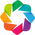

In [3]:
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

hv.extension('bokeh')
hv.output(size=200)


In [8]:
df_2015.drop(columns=["Year","Unnamed: 0"],inplace=True)

In [9]:
def remove(string):
    return "".join(string.split())

In [10]:
nodes = sorted(list(set(df_2015["From"].unique().tolist()+df_2015["To"].unique().tolist())))
nodes_df = pd.DataFrame(nodes,columns=["Country"])

nodes_list = []
for row in nodes_df["Country"]:
    nodes_list.append(remove(row))

tes = pd.DataFrame(sorted(nodes_list),columns=["Country"])
nodes = hv.Dataset(pd.DataFrame(sorted(nodes_list),columns=["Country"]))

In [11]:
df_2015["To"] = df_2015["To"].str.replace(' ','')
df_2015["From"] = df_2015["From"].str.replace(' ','')

In [13]:
%%opts Chord [height=350 width=350 title="EU Interconnection Export/Import" labels="Country"]
%%opts Chord (node_color="Country" node_cmap="Category20" edge_color="From" edge_cmap='Category20')


hv.Chord((df_2015,nodes))


:Chord   [From,To]   (Value)